In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from pathlib import Path
import os.path

"""
This example shows how images are represented using pixels, color channels and data types.
"""

# read image to array
im = np.array(Image.open('./data/turningtorso1.jpg'))
print("Shape is: {0} of type {1}".format(im.shape, im.dtype))

# read grayscale version to float array
im = np.array(Image.open('./data/turningtorso1.jpg').convert('L'),'f')
print("Shape is: {0} of type {1}".format(im.shape, im.dtype))

# visualize the pixel value of a small region
col_1, col_2 = 140, 225
row_1, row_2 = 180, 265

# crop using array slicing
crop = im[col_1:col_2,row_1:row_2]
cols, rows = crop.shape

print("Created crop of shape: {0}".format(crop.shape))

In [ ]:
# generate all the plots
pl.figure()
pl.imshow(im)
pl.gray()
pl.plot([row_1, row_2, row_2, row_1, row_1], [col_1, col_1, col_2, col_2, col_1], linewidth=2)
pl.axis('off')
pl.show()

In [ ]:
pl.figure()
pl.imshow(crop)
pl.gray()
pl.axis('off')
pl.show()

In [ ]:
pl.figure()
pl.imshow(crop)
pl.gray()
pl.plot(20*np.ones(cols), linewidth=10)
pl.axis('off')
pl.show()

In [ ]:
print(10*np.ones(cols)) 
range(10)

In [ ]:
pl.figure()
pl.plot(crop[50,:])
pl.ylabel("Graylevel value")
pl.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
fig = pl.figure()
ax = fig.gca(projection='3d')
# surface plot with transparency 0.5
X,Y = np.meshgrid(np.arange(cols),-np.arange(rows)) 
ax.plot_surface(X, Y, crop, alpha=0.5, cstride=2, rstride=2)
pl.show()

In [ ]:
help(ax.plot_surface)

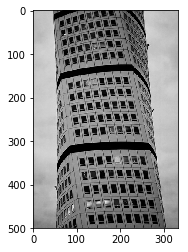

In [11]:
from PIL import Image
from numpy import *
from scipy.ndimage import measurements,morphology

"""
This is the morphology counting objects example in Section 1.4.
"""

# load image and threshold to make sure it is binary
im = array(Image.open('./data/turningtorso1.jpg').convert('L'))
pl.figure();
pl.imshow(im)
pl.show();

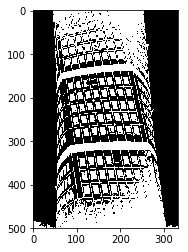

Number of objects: 464
Number of objects: 2


In [12]:
im = (im<128)
pl.figure();
pl.imshow(im)
pl.show();

labels, nbr_objects = measurements.label(im)
print("Number of objects:", nbr_objects)

# morphology - opening to separate objects better
im_open = morphology.binary_opening(im,ones((9,5)),iterations=7) 

labels_open, nbr_objects_open = measurements.label(im_open)
print("Number of objects:", nbr_objects_open)